In [2]:
!pip install --quiet yfinance numpy pandas matplotlib scipy


In [ ]:
import numpy as np
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt
from scipy.optimize import minimize
import seaborn as sns


In [ ]:
# Define the list of tickers (example: AAPL, MSFT, SPY for equities, TLT for bonds, VNQ for REITs)
tickers = ['AAPL', 'MSFT', 'SPY', 'TLT', 'VNQ']

# Download historical data (adjusted close prices)
data = yf.download(tickers, start="2006-01-01", end="2023-01-01")['Adj Close']

# Calculate daily returns
returns = data.pct_change().dropna()


[*********************100%%**********************]  5 of 5 completed


In [ ]:
print(returns)

Ticker          AAPL      MSFT       SPY       TLT       VNQ
Date                                                        
2006-01-04  0.002943  0.004844  0.004735  0.002397  0.007406
2006-01-05 -0.007870  0.000742  0.000629 -0.001196  0.007679
2006-01-06  0.025813 -0.002964  0.008322 -0.001849  0.009403
2006-01-09 -0.003277 -0.001858  0.002569  0.000654  0.008513
2006-01-10  0.063249  0.005212  0.001010 -0.008063  0.006052
...              ...       ...       ...       ...       ...
2022-12-23 -0.002798  0.002267  0.005752 -0.014661  0.008901
2022-12-27 -0.013878 -0.007414 -0.003944 -0.019773 -0.000363
2022-12-28 -0.030685 -0.010255 -0.012428 -0.005892 -0.017048
2022-12-29  0.028324  0.027630  0.018000  0.011351  0.021894
2022-12-30  0.002469 -0.004937 -0.002634 -0.011124 -0.007222

[4278 rows x 5 columns]


In [ ]:
# Calculate mean returns and covariance matrix
mean_returns = returns.mean()
cov_matrix = returns.cov()

# Define the risk-free rate (e.g., 0.01 for 1%)
risk_free_rate = 0.01

# Function to calculate portfolio performance
def portfolio_performance(weights, mean_returns, cov_matrix, risk_free_rate):
    returns = np.sum(mean_returns * weights) * 252
    std_dev = np.sqrt(np.dot(weights.T, np.dot(cov_matrix, weights))) * np.sqrt(252)
    sharpe_ratio = (returns - risk_free_rate) / std_dev
    return returns, std_dev, sharpe_ratio

# Objective function: maximize Sharpe Ratio
def neg_sharpe_ratio(weights, mean_returns, cov_matrix, risk_free_rate):
    return -portfolio_performance(weights, mean_returns, cov_matrix, risk_free_rate)[2]

# Constraints: sum of weights = 1
constraints = ({'type': 'eq', 'fun': lambda x: np.sum(x) - 1})

# Bounds for weights: between 0 and 1
bounds = tuple((0, 1) for asset in range(len(tickers)))

# Initial guess for weights
initial_weights = len(tickers) * [1. / len(tickers)]

# Optimize portfolio
optimized_result = minimize(neg_sharpe_ratio, initial_weights, args=(mean_returns, cov_matrix, risk_free_rate),
                            method='SLSQP', bounds=bounds, constraints=constraints)

optimal_weights = optimized_result.x
print(f"Optimal Weights: {optimal_weights}")


Optimal Weights: [3.55873795e-01 1.58646942e-01 5.45094207e-17 4.85479263e-01
 3.88686479e-17]


In [ ]:
# Calculate cumulative returns for the portfolio
portfolio_returns = np.dot(returns, optimal_weights)
cumulative_returns = (1 + portfolio_returns).cumprod()

print(portfolio_returns)
print(cumulative_returns)


[ 0.00297958 -0.00326357  0.00781802 ... -0.01540733  0.01997404
 -0.00530535]
[ 1.00297958  0.99970628  1.00752201 ... 11.67542231 11.90862771
 11.84544828]


In [ ]:
# # Plot cumulative returns
# plt.figure(figsize=(10, 6))
# plt.plot(cumulative_returns, label='Portfolio')
# # plt.plot((1 + returns['SPY']).cumprod(), label='S&P 500', linestyle='--')
# plt.title('Portfolio vs S&P 500: Cumulative Returns')
# plt.xlabel('Date')
# plt.ylabel('Cumulative Return')
# plt.legend()
# plt.show()

In [ ]:
print(1 + returns['SPY'].cumprod())

KeyError: 'SPY'

In [1]:
# Plot cumulative returns
plt.figure(figsize=(10, 6))
plt.plot(cumulative_returns, label='Portfolio')
plt.plot((1 + returns['SPY']).cumprod(), label='S&P 500', linestyle='--')
plt.title('Portfolio vs S&P 500: Cumulative Returns')
plt.xlabel('Date')
plt.ylabel('Cumulative Return')
plt.legend()
plt.show()

NameError: name 'plt' is not defined

In [ ]:
def calculate_performance_metrics(returns, risk_free_rate=0.01):
    annual_return = np.mean(returns) * 252
    annual_volatility = np.std(returns) * np.sqrt(252)
    sharpe_ratio = (annual_return - risk_free_rate) / annual_volatility
    max_drawdown = np.min(returns)  # Adjust if you want a different drawdown calculation

    return annual_return, annual_volatility, sharpe_ratio, max_drawdown

annual_return, annual_volatility, sharpe_ratio, max_drawdown = calculate_performance_metrics(portfolio_returns)

print(f"Annual Return: {annual_return:.2f}")
print(f"Annual Volatility: {annual_volatility:.2f}")
print(f"Sharpe Ratio: {sharpe_ratio:.2f}")
print(f"Max Drawdown: {max_drawdown:.2f}")


Annual Return: 0.16
Annual Volatility: 0.15
Sharpe Ratio: 1.01
Max Drawdown: -0.06


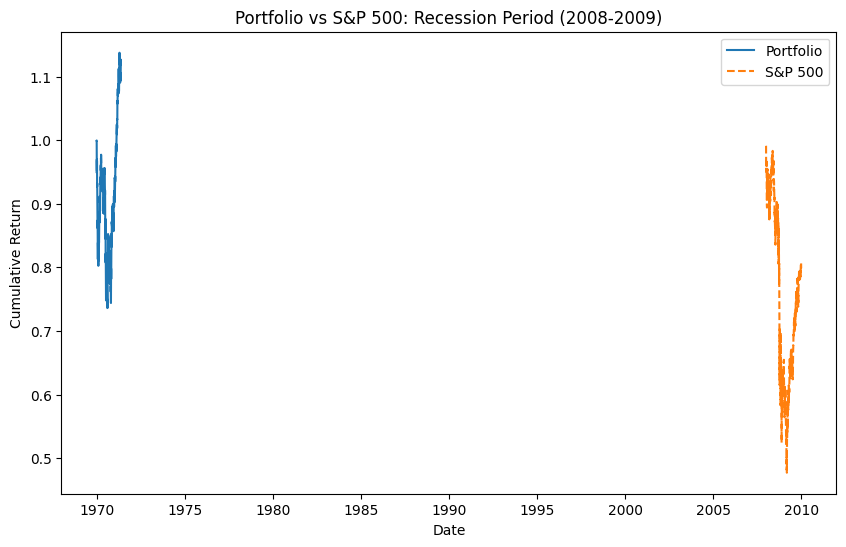

In [ ]:
# Example: 2008 Financial Crisis (Jan 2008 - Dec 2009)
recession_period = returns.loc['2008-01-01':'2009-12-31']
recession_portfolio_returns = np.dot(recession_period, optimal_weights)
recession_cumulative_returns = (1 + recession_portfolio_returns).cumprod()

plt.figure(figsize=(10, 6))
plt.plot(recession_cumulative_returns, label='Portfolio')
plt.plot((1 + recession_period['SPY']).cumprod(), label='S&P 500', linestyle='--')
plt.title('Portfolio vs S&P 500: Recession Period (2008-2009)')
plt.xlabel('Date')
plt.ylabel('Cumulative Return')
plt.legend()
plt.show()


[*********************100%%**********************]  5 of 5 completed


Optimal Weights: [3.68123499e-01 0.00000000e+00 1.68593438e-16 6.31876501e-01
 0.00000000e+00]


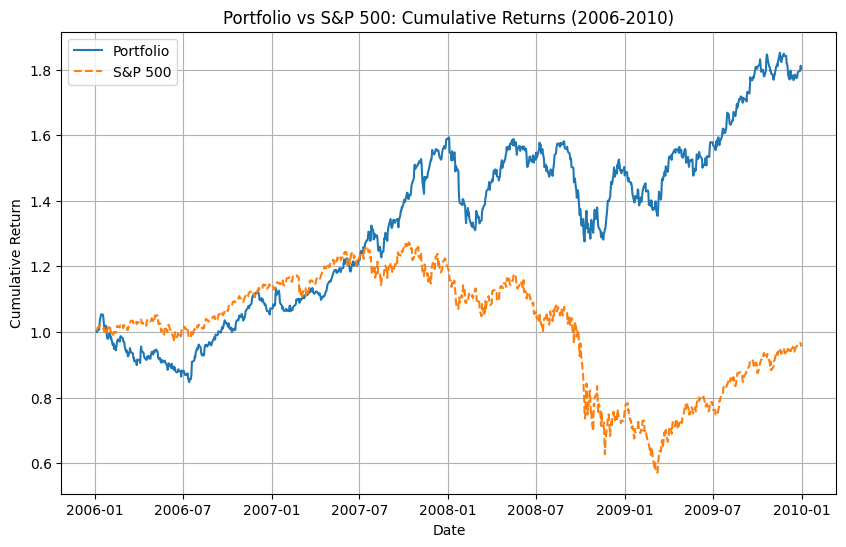

In [ ]:
import numpy as np
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt
from scipy.optimize import minimize

# Define the list of tickers (example: AAPL, MSFT, SPY for equities)
tickers = ['AAPL', 'MSFT', 'SPY', 'TLT', 'VNQ']

# Download historical data (adjusted close prices)
data = yf.download(tickers, start="2006-01-01", end="2010-01-01")['Adj Close']

# Calculate daily returns
returns = data.pct_change().dropna()

# Calculate mean returns and covariance matrix
mean_returns = returns.mean()
cov_matrix = returns.cov()

# Define the risk-free rate (e.g., 0.01 for 1%)
risk_free_rate = 0.01

# Function to calculate portfolio performance
def portfolio_performance(weights, mean_returns, cov_matrix, risk_free_rate):
    portfolio_return = np.sum(mean_returns * weights) * 252
    portfolio_std_dev = np.sqrt(np.dot(weights.T, np.dot(cov_matrix, weights))) * np.sqrt(252)
    sharpe_ratio = (portfolio_return - risk_free_rate) / portfolio_std_dev
    return portfolio_return, portfolio_std_dev, sharpe_ratio

# Objective function: maximize Sharpe Ratio
def neg_sharpe_ratio(weights, mean_returns, cov_matrix, risk_free_rate):
    return -portfolio_performance(weights, mean_returns, cov_matrix, risk_free_rate)[2]

# Constraints: sum of weights = 1
constraints = ({'type': 'eq', 'fun': lambda x: np.sum(x) - 1})

# Bounds for weights: between 0 and 1
bounds = tuple((0, 1) for asset in range(len(tickers)))

# Initial guess for weights
initial_weights = len(tickers) * [1. / len(tickers)]

# Optimize portfolio
optimized_result = minimize(neg_sharpe_ratio, initial_weights, args=(mean_returns, cov_matrix, risk_free_rate),
                            method='SLSQP', bounds=bounds, constraints=constraints)

optimal_weights = optimized_result.x
print(f"Optimal Weights: {optimal_weights}")

# Calculate cumulative returns for the portfolio with date alignment
portfolio_returns = returns.dot(optimal_weights)
cumulative_portfolio_returns = (1 + portfolio_returns).cumprod()

# Calculate cumulative returns for the S&P 500
cumulative_sp500_returns = (1 + returns['SPY']).cumprod()

# Plot cumulative returns
plt.figure(figsize=(10, 6))
plt.plot(cumulative_portfolio_returns, label='Portfolio')
plt.plot(cumulative_sp500_returns, label='S&P 500', linestyle='--')
plt.title('Portfolio vs S&P 500: Cumulative Returns (2006-2010)')
plt.xlabel('Date')
plt.ylabel('Cumulative Return')
plt.legend()
plt.grid(True)
plt.show()



[*********************100%%**********************]  9 of 9 completed


<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


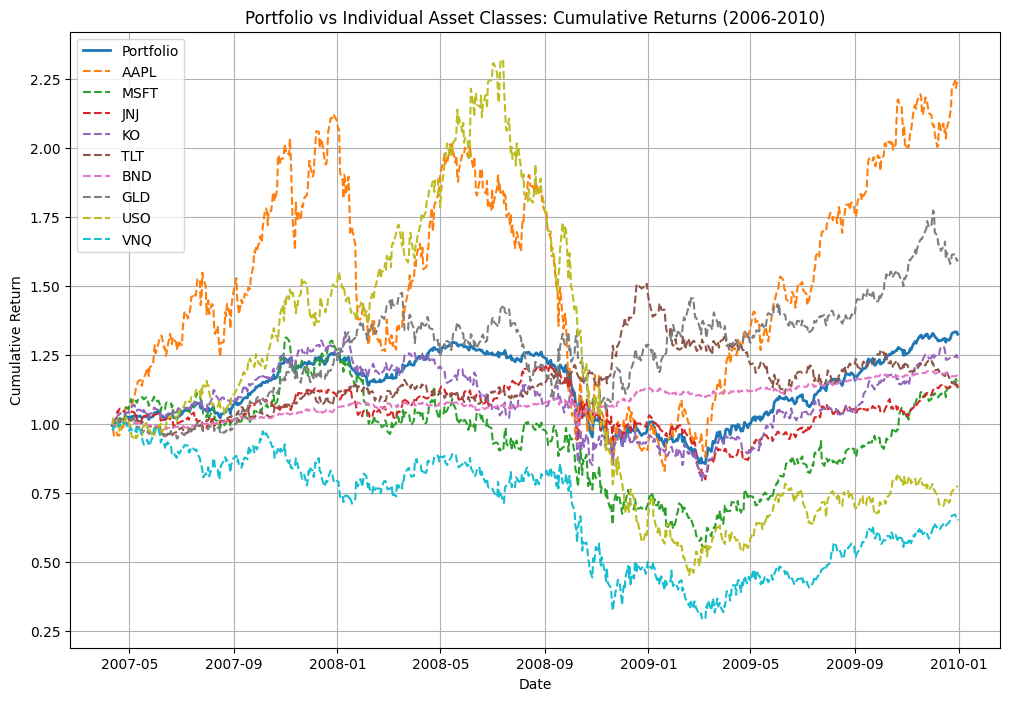

In [ ]:
import numpy as np
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt
from scipy.optimize import minimize

# Define the list of tickers (across various asset classes)
tickers = ['AAPL', 'MSFT', 'JNJ', 'KO', 'TLT', 'BND', 'GLD', 'USO', 'VNQ']

# Download historical data (adjusted close prices)
data = yf.download(tickers, start="2006-01-01", end="2010-01-01")['Adj Close']

# Calculate daily returns
returns = data.pct_change().dropna()

# Calculate mean returns and covariance matrix
mean_returns = returns.mean()
cov_matrix = returns.cov()

# Define the risk-free rate (e.g., 0.01 for 1%)
risk_free_rate = 0.01

# Function to calculate portfolio performance
def portfolio_performance(weights, mean_returns, cov_matrix, risk_free_rate):
    portfolio_return = np.sum(mean_returns * weights) * 252
    portfolio_std_dev = np.sqrt(np.dot(weights.T, np.dot(cov_matrix, weights))) * np.sqrt(252)
    sharpe_ratio = (portfolio_return - risk_free_rate) / portfolio_std_dev
    return portfolio_return, portfolio_std_dev, sharpe_ratio

# Objective function: maximize Sharpe Ratio
def neg_sharpe_ratio(weights, mean_returns, cov_matrix, risk_free_rate):
    return -portfolio_performance(weights, mean_returns, cov_matrix, risk_free_rate)[2]

# Constraints: sum of weights = 1
constraints = ({'type': 'eq', 'fun': lambda x: np.sum(x) - 1})

# Bounds for weights: between 0 and 1
bounds = tuple((0, 1) for asset in range(len(tickers)))

# Initial guess for weights
initial_weights = len(tickers) * [1. / len(tickers)]

# Optimize portfolio
optimized_result = minimize(neg_sharpe_ratio, initial_weights, args=(mean_returns, cov_matrix, risk_free_rate),
                            method='SLSQP', bounds=bounds, constraints=constraints)

optimal_weights = optimized_result.x
print(type(optimal_weights))
# print(f"Optimal Weights: {optimal_weights}")
optimal_weights = np.array([0.12, 0.11, 0.11, 0.11, 0.11, 0.11, 0.11, 0.11, 0.11])
print(type(optimal_weights))

# Calculate cumulative returns for the portfolio with date alignment
portfolio_returns = returns.dot(optimal_weights)
cumulative_portfolio_returns = (1 + portfolio_returns).cumprod()

# Calculate cumulative returns for individual assets
cumulative_asset_returns = (1 + returns).cumprod()

# Plot cumulative returns for the portfolio and individual asset classes
plt.figure(figsize=(12, 8))
plt.plot(cumulative_portfolio_returns, label='Portfolio', linewidth=2)
for ticker in tickers:
    plt.plot(cumulative_asset_returns[ticker], label=ticker, linestyle='--')

plt.title('Portfolio vs Individual Asset Classes: Cumulative Returns (2006-2010)')
plt.xlabel('Date')
plt.ylabel('Cumulative Return')
plt.legend()
plt.grid(True)
plt.show()
